In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 20)

In [6]:
hkws = pd.read_csv('hkws_dzjy.csv', encoding='GBK')

hkws['month'] = hkws.tradeDate.str.slice(0,7)

hkws.groupby('month').tradeVol.sum()

month
2011-01       4.30
2011-08    1628.00
2012-02     470.00
2012-03    1385.00
2012-05    1346.00
            ...   
2016-06    2802.98
2016-07     502.49
2016-08      20.00
2016-09     365.47
2016-10     422.42
Name: tradeVol, dtype: float64

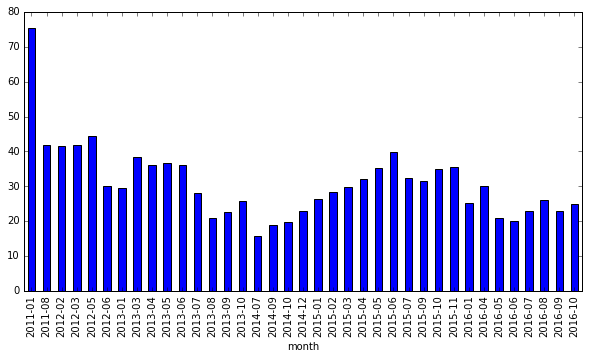

In [7]:
hkwsGroup = hkws.groupby('month')

monthVol = pd.DataFrame({'month':hkwsGroup.tradeVol.sum().index, 
                         'monthVol': hkwsGroup.tradeVol.sum().reset_index(drop=True)})
# monthVol

hkwsGroup1 = pd.merge(hkws, monthVol, on='month', how='left')
hkwsGroup1['wpctMonth'] = hkwsGroup1.tradeVol/hkwsGroup1.monthVol
hkwsGroup1['wtPriceMonth'] = hkwsGroup1.wpctMonth*hkwsGroup1.tradePrice

hkwsGroup1.groupby('month').wtPriceMonth.sum()

plt.figure(figsize=(10, 5))
hkwsGroup1.groupby('month').wtPriceMonth.sum().plot(kind="bar")